In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
import datetime

import ipywidgets

%matplotlib widget
import numpy as np

In [25]:
def days_in_year(year=datetime.datetime.now().year):
    return 365 + calendar.isleap(year)

In [38]:
bauxite= pd.read_excel("Data/yearly_bauxite.xlsx")

bauxite = bauxite[['Year','Production']]
bauxite['Year'] = pd.to_datetime(bauxite['Year'] , format='%Y')
bauxite = bauxite.set_index('Year')
bauxite.Production = bauxite.Production.astype(float)

start_date = bauxite.index.min() - pd.DateOffset(day=1)
end_date = bauxite.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'Date'
bauxite = bauxite.reindex(dates, method='ffill')

bauxite['Production'] = bauxite['Production']/365
bauxite = bauxite.reset_index(drop=False)
bauxite


,Date,Production
0,2011-01-01,695.890411
1,2011-01-02,695.890411
2,2011-01-03,695.890411
3,2011-01-04,695.890411
4,2011-01-05,695.890411
...,...,...
3679,2021-01-27,1068.493151
3680,2021-01-28,1068.493151
3681,2021-01-29,1068.493151
3682,2021-01-30,1068.493151


In [40]:
alu_prices = pd.read_csv("../data/Aluminium Historical Data.csv")
alu_prices["Date"] = pd.to_datetime(alu_prices["Date"]) 
alu_prices.Price = alu_prices.Price.apply(lambda x: x.replace(",", ""))
alu_prices["Price"] = alu_prices["Price"].astype("float")
alu_prices

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-11-22,2438.50,"2,376.00","2,439.50","2,371.50",NaN,2.26%
1,2022-11-21,2384.50,"2,398.50","2,406.00","2,357.00",NaN,-1.87%
2,2022-11-18,2430.00,"2,400.00","2,399.50","2,400.00",NaN,1.63%
3,2022-11-17,2391.00,"2,380.00","2,370.50","2,371.00",37.17K,-0.87%
4,2022-11-16,2412.00,"2,424.00","2,424.00","2,420.00",31.53K,-0.94%
...,...,...,...,...,...,...,...
2131,2014-06-20,1888.50,"1,888.50","1,888.50","1,888.50",18.51K,-0.11%
2132,2014-06-19,1890.50,"1,890.50","1,890.50","1,890.50",26.66K,0.85%
2133,2014-06-18,1874.50,"1,874.50","1,874.50","1,874.50",26.12K,1.21%
2134,2014-06-17,1852.00,"1,852.00","1,852.00","1,852.00",45.55K,0.64%


In [46]:
df = pd.merge(left=alu_prices[["Date", "Price"]], right=bauxite, on="Date", how="left")
df = df.set_index(df['Date'])
df = df[['Price', 'Production']]
df = df.loc['1997-10-01':'2022-01-01']
df = df.sort_index()
#df = pd.merge(left=df, right=bauxite, on="Date", how="left")
df

<ipython-input-46-2d58969ca564>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['1997-10-01':'2022-01-01']


,Price,Production
Date,,
2014-06-16,1840.25,706.849315
2014-06-17,1852.00,706.849315
2014-06-18,1874.50,706.849315
2014-06-19,1890.50,706.849315
2014-06-20,1888.50,706.849315
...,...,...
2021-12-23,2846.00,NaN
2021-12-24,2837.00,NaN
2021-12-29,2810.50,NaN


In [47]:
cols = ['Price', 'Production']

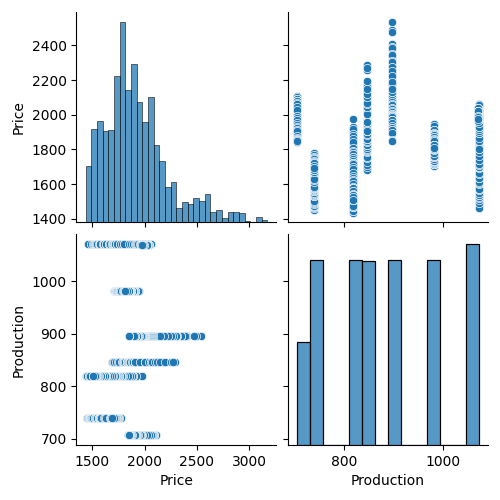

In [48]:
sns.pairplot(df[cols])

In [50]:
df.corr()


,Price,Production
Price,1.000000,0.042024
Production,0.042024,1.000000
